In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.models import load_model

Using TensorFlow backend.


In [2]:
def detect_face(image):
    print(image.shape)
    #opencvを使って顔抽出
    image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cascade = cv2.CascadeClassifier("/usr/local/opt/opencv/share/OpenCV/haarcascades/haarcascade_frontalface_alt.xml")
    # 顔認識の実行
    face_list=cascade.detectMultiScale(image_gs, scaleFactor=1.1, minNeighbors=2,minSize=(64,64))
    #顔が１つ以上検出された時
    if len(face_list) > 0:
        for rect in face_list:
            x,y,width,height=rect
            cv2.rectangle(image, tuple(rect[0:2]), tuple(rect[0:2]+rect[2:4]), (255, 0, 0), thickness=3)
            img = image[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
            if image.shape[0]<64:
                print("too small")
                continue
            img = cv2.resize(image,(64,64))
            img=np.expand_dims(img,axis=0)
            name = detect_who(img)
            cv2.putText(image,name,(x,y+height+20),cv2.FONT_HERSHEY_DUPLEX,1,(255,0,0),2)
    #顔が検出されなかった時
    else:
        print("no face")
    return image

In [3]:
def detect_who(img):
    #予測
    name=""
    print(model.predict(img))
    nameNumLabel=np.argmax(model.predict(img))
    if nameNumLabel== 0: 
        name="Asian"
    elif nameNumLabel==1:
        name="Caucasian"
    elif nameNumLabel==2:
        name="Hispanic"
    elif nameNumLabel==3:
        name="Multiracial"
    elif nameNumLabel==4:
        name="Black"
    print(name)
    return name

In [4]:
model = load_model('./results/my_model.h5')

(205, 246, 3)
[[ 0.  1.  0.  0.  0.]]
Caucasian


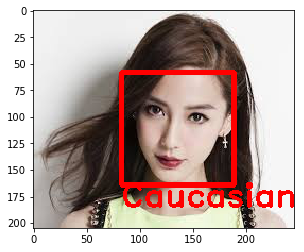

In [9]:
image=cv2.imread("./image/a.jpeg")
if image is None:
    print("Not open:")
b,g,r = cv2.split(image)
image = cv2.merge([r,g,b])
whoImage=detect_face(image)

plt.imshow(whoImage)
plt.show()

In [12]:
Asian:アジア人
Caucasian:白人（欧米系）
Hispanic:スペイン人



SyntaxError: invalid character in identifier (<ipython-input-12-f49db5d88da9>, line 2)